Proyecto DS4A- E- COMMERCE

In [1]:
# Import the Pandas package
import pandas as pd

# Import the NumPy package
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Import Datasets 

In [64]:
customers_dataset = pd.read_csv("data/olist_customers_dataset.csv")#
geolocation_dataset = pd.read_csv("data/olist_geolocation_dataset.csv")
order_items_dataset = pd.read_csv("data/olist_order_items_dataset.csv")#
#order_payments_dataset = pd.read_csv("data/olist_order_payments_dataset.csv")
order_reviews_dataset = pd.read_csv("data/olist_order_reviews_dataset.csv")#
orders_dataset = pd.read_csv("data/olist_orders_dataset.csv")#
products_dataset = pd.read_csv("data/olist_products_dataset.csv")#
seller_dataset = pd.read_csv("data/olist_sellers_dataset.csv")#
product_category_name_translation = pd.read_csv("data/product_category_name_translation.csv")#


![Captura.PNG](attachment:Captura.PNG)

data set that contain the id, unique id, the zip code, the citya and the state of the costumer


## 2. join the data sets and creade stadistics KPI'S


In [3]:
df_orders = pd.merge(customers_dataset,orders_dataset, how = "left", left_on = "customer_id", right_on = "customer_id")
df_orders = pd.merge(df_orders,order_reviews_dataset, how = "left", left_on = "order_id", right_on = "order_id")
#df_orders = pd.merge(mg_dataset2,seller_dataset,how = "left", left_on = "seller_id", right_on = "seller_id")
#mg_dataset2 = pd.merge(mg_dataset1,order_payments_dataset, how = "left", left_on ="order_id",right_on ="order_id")
#mg_dataset3 = pd.merge(mg_dataset2,order_reviews_dataset, how = "left", left_on = "order_id", right_on = "order_id")
#mg_dataset4 = pd.merge(mg_dataset3,order_items_dataset,how = "left", left_on = "order_id", right_on = "order_id")
#mg_dataset5 = pd.merge(mg_dataset4,products_dataset,how = "left", left_on = "product_id", right_on = "product_id")
#df = pd.merge(mg_dataset5,seller_dataset,how = "left", left_on = "seller_id", right_on = "seller_id")
#df = pd.merge(mg_dataset6,geolocation_dataset, how = "left", left_on = "customer_zip_code_prefix", right_on = "geolocation_zip_code_prefix")
df_items=pd.merge(order_items_dataset,products_dataset,how='left',left_on='product_id',right_on='product_id')
df_items=pd.merge(df_items,product_category_name_translation,how='left',left_on='product_category_name',right_on='product_category_name')
df_items=pd.merge(df_items,seller_dataset,how='left',left_on='seller_id',right_on='seller_id')



In [80]:
import unicodedata
geolocation_dataset['geolocation_city']=geolocation_dataset['geolocation_city'].apply(lambda x: unicode.normalize('NFKD',x).encode("ascii","ignore").decode("ascii"))
geolocation_dataset['geolocation_city'].unique()


array(['sao paulo', 'sao bernardo do campo', 'jundiai', ...,
       'floriano peixoto', 'erebango', 'santa cecilia do sul'], dtype=object)

In [104]:
maxlat=5.25
minlat=-33.75
minlng=-74
maxlng=-29
geolocation_dataset=geolocation_dataset.drop(geolocation_dataset[(geolocation_dataset['geolocation_lat']>maxlat) | (geolocation_dataset['geolocation_lat']<minlat)|(geolocation_dataset['geolocation_lng']>maxlng) | (geolocation_dataset['geolocation_lng']<minlng)].index)
df_geo=geolocation_dataset.groupby('geolocation_zip_code_prefix').aggregate({'geolocation_lat':'mean','geolocation_lng':'mean'})
temp=geolocation_dataset.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state']).count().reset_index()

df_geo=df_geo.merge(temp[['geolocation_zip_code_prefix','geolocation_city','geolocation_state']],how='left',on='geolocation_zip_code_prefix')
df_geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1001,-23.550190,-46.634024,sao paulo,SP
1,1002,-23.548146,-46.634979,sao paulo,SP
2,1003,-23.548994,-46.635731,sao paulo,SP
3,1004,-23.549799,-46.634757,sao paulo,SP
4,1005,-23.549456,-46.636733,sao paulo,SP


In [105]:
df_orders=df_orders.merge(df_geo,how='left',right_on='geolocation_zip_code_prefix',left_on='customer_zip_code_prefix')
df_orders.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,14409.0,-20.498489,-47.396929,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,9790.0,-23.727992,-46.542848,sao bernardo do campo,SP


In [108]:
df_items=df_items.merge(df_geo,how='left',right_on='geolocation_zip_code_prefix',left_on='seller_zip_code_prefix')
df_items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_length,...,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,...,14.0,cool_stuff,27277,volta redonda,SP,27277.0,-22.496953,-44.127492,volta redonda,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop,56.0,239.0,...,40.0,pet_shop,3471,sao paulo,SP,3471.0,-23.565096,-46.518565,sao paulo,SP


Hasta aca quedaron dos tablas:

**df_ orders** que tiene un registro por cada compra en olist y dentro tiene:

1. Informacion de la orden
2. Informacion del cliente
3. Informacion del Review del cliente
4. Georeferenciacion del cliente

**df_items** que tiene un registro por cada item que se ha despachado y dentro tiene:

1. Informacion de cada producto
2. Numero de Orden  a la que esta relacionada
3. Informacion del vendedor (Cada item es despachada por un unico vendedor, pero una orden puede ser despachada por varios vendedores)
4. Georeferenciacion del vendedor

La informacion de **georeferenciacion** llega solo al zipcode del comprador y del vendedor, parece que le eliminaron la direccion, pero dejaron las coordenadas, por lo que incluir esta informacion hace que los registros se repitan la cantidad de clientes+vendedores que existan en el mismo zipcode

La informacion de pagos creo que puede ser relevante, pero tiene el problema de que el cliente puede hacer el pago con mas de un metodo, al final creo que la informacion relevante es que medio uso (solo hay 4 o 5 medios) y puede que tambien sea relevante en cuantas partes dividio el pago (numero maximo de payment_sequential)


**Sugerencia1**: En la tabla de reviews, hay ordenes que tienen mas de un review, debemos limpiarla y dejar el ultimo por fecha de registro del review (el cliente pudo cambiar de opinion o contestar la encuesta varias veces)

**Sugerencia 2**: Hacer con los pagos 5 variables categoricas para determinar los medios de pago que utilizo el cliente en cada ordes, agregar el numero de payments con el max de payment_sequential y llevar estas 6 variables a la tabla df_orders

In [4]:
df_orders.info() # Entendimiento de las variables.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   customer_id                    100000 non-null  object
 1   customer_unique_id             100000 non-null  object
 2   customer_zip_code_prefix       100000 non-null  int64 
 3   customer_city                  100000 non-null  object
 4   customer_state                 100000 non-null  object
 5   order_id                       100000 non-null  object
 6   order_status                   100000 non-null  object
 7   order_purchase_timestamp       100000 non-null  object
 8   order_approved_at              99839 non-null   object
 9   order_delivered_carrier_date   98207 non-null   object
 10  order_delivered_customer_date  97013 non-null   object
 11  order_estimated_delivery_date  100000 non-null  object
 12  review_id                      100000 non-nul

Revisando la información de las variables que componen el Data Frame, nos damos cuenta que order_delivered_carrier_date,order_delivered_customer_date,review_comment_title y review_comment_message presentan valores NA dentro de sus columnas. adempas que tenemos un total de 100.000 registros unicos en la base haciendo referencia a las compras que hicieron los clientes


       DATE  customer_unique_id
0   2016-09                   4
1   2016-10                 327
2   2016-12                   1
3   2017-01                 807
4   2017-02                1788
5   2017-03                2697
6   2017-04                2411
7   2017-05                3737
8   2017-06                3277
9   2017-07                4068
10  2017-08                4374
11  2017-09                4312
12  2017-10                4664
13  2017-11                7598
14  2017-12                5701
15  2018-01                7313
16  2018-02                6817
17  2018-03                7250
18  2018-04                6951
19  2018-05                6882
20  2018-06                6173
21  2018-07                6314
22  2018-08                6514
23  2018-09                  16
24  2018-10                   4


<AxesSubplot:xlabel='DATE'>

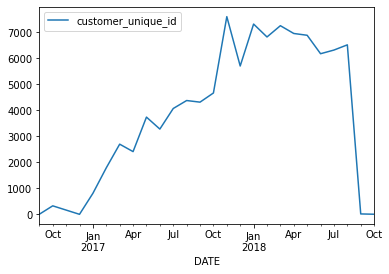

In [5]:
#Grafica del numero de ordenes por mes de análisis
df_orders["DATE"] = pd.to_datetime(df_orders["order_purchase_timestamp"])
df_orders["DATE"] = df_orders["DATE"].dt.to_period(freq = "M")

orders_by_month = df_orders.groupby('DATE')['customer_unique_id'].count().reset_index(drop = False)
print(orders_by_month)


#Line Plot for the Colission by date.
orders_by_month.plot(x= "DATE",y="customer_unique_id")



Creación de una variable que calcule el tiempo que se demora en entregar un producto desde que se realizó la compra por la plataforma, pues puede ser una variable explicativa del socore de los clientes.


In [6]:
#CREACIÓN DE UNA VARIABLE DEL TIEMPO ENTRE COMPRA Y ENTREGA DE PRODUCTO
# Then with the remaining values, convert them to datetime objects
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'], format='%Y/%m/%d %H:%M:%S')
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'], format='%Y/%m/%d %H:%M:%S')

df_orders['time_duration'] = (df_orders['order_delivered_customer_date'] - df_orders['order_purchase_timestamp'])
df_orders['time_duration'] = df_orders['time_duration'].apply(lambda x: x.days)
# At this point, its important to know the time duration since customer purchase and delivery.

df_orders['time_duration'].describe()

count    97013.000000
mean        12.100523
std          9.547911
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: time_duration, dtype: float64

Como se evidencia en el resultado anterior, el promedio de dias que toma un producto en ser entregado desde el día de compra es de 12 dias. Lo importante aquí es que se encontró que el valor maximo de tiempo de duración es de 209 dias, al rededor de 7 meses, algo bastante extraño y que ahondaremos más adelante.


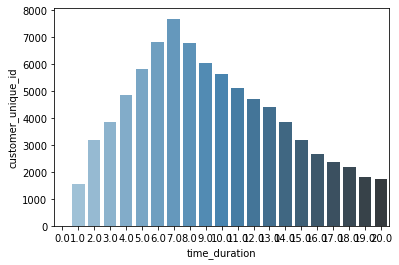

In [8]:
df_subset= df_orders[df_orders.time_duration <= 20]
df_by_duration = df_subset.groupby(['time_duration'])['customer_unique_id'].count().reset_index(drop = False)
x = sns.barplot(x="time_duration", y="customer_unique_id", data=df_by_duration,palette="Blues_d")

Evidenciamos que la distribución al rededor de la grafica se concentra en los periodos comprendidos entre 0 y 7 dias de demora en entrega del producto, y continua decendiendo. ahora bien esto nos puede dar indicios queel promedio de demora no suele ser superior a los 7 dias para el promedio de datos de toda la base, pero es relevante compararlo con los scores en reviews para poder identificar algún patrón.

/home/jovyan/.local/lib/python3.6/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


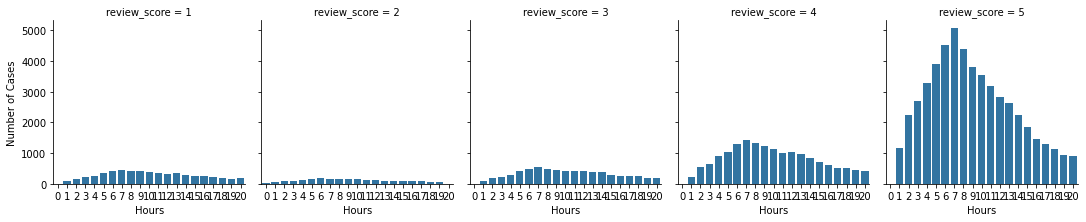

In [9]:
df_subset= df_orders[df_orders.time_duration <= 20]
df_subset.time_duration = df_subset.time_duration.astype(int)
df_by_duration = df_subset.groupby(['time_duration','review_score'])['customer_unique_id'].count().reset_index(drop = False)
g = sns.FacetGrid(df_by_duration, col = 'review_score')
g.set_xticklabels(fontsize=10)
g.map_dataframe(sns.barplot, x= 'time_duration', y = 'customer_unique_id')
g.set_axis_labels("Hours", "Number of Cases")

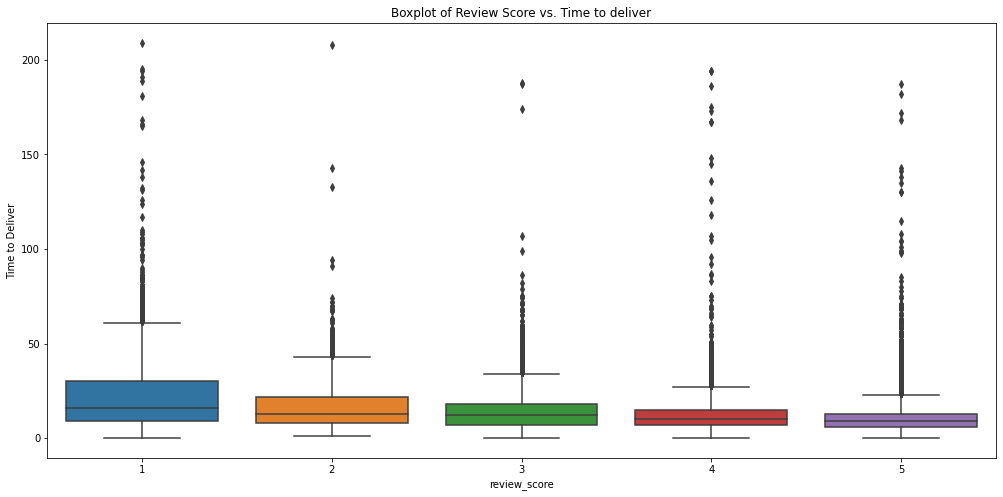

In [20]:
plt.figure(figsize=(17,8))
sns.boxplot(y = 'time_duration', x='review_score', data = df_orders)
title_string = "Boxplot of Review Score vs. Time to deliver" 
plt.ylabel("Time to Deliver")
_=plt.title(title_string)

Evidenciamos que a pesar que el score 5 en los reviews presenta más registros que los otros valores, en promedio el maximo tiempo de duración para las cinco calificaciones es 7 días. Otro dato relevante es que para el caso de un score de 1 y 2, parece que la distribución a lo largo de la duración de entrega es constante, pareciendo que pueden haber otras razones aparte de la duración de entrga que influya en la calificación.


Por lo anterior, podría ser interesante preguntarnos el coeficiente de correlación entre el socre de review y el numero de dias de entrega del producto, lo cual calculamos acontinuación:
    

In [10]:
#productos MAS vendidos:
df_products = df_items.groupby('product_category_name_english')['order_id'].count().reset_index(drop = False)
df_products = df_products.sort_values(by = 'order_id', ascending = False).reset_index(drop = True)
top_products = df_products.head(10)
top_products

,product_category_name_english,order_id
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827
5,housewares,6964
6,watches_gifts,5991
7,telephony,4545
8,garden_tools,4347
9,auto,4235


In [11]:
#productos menos vendidos:
df_products = df_items.groupby('product_category_name_english')['order_id'].count().reset_index(drop = False)
df_products = df_products.sort_values(by = 'order_id', ascending = True).reset_index(drop = True)
deep_10_products = df_products.head(10)
deep_10_products

,product_category_name_english,order_id
0,security_and_services,2
1,fashion_childrens_clothes,8
2,la_cuisine,14
3,cds_dvds_musicals,14
4,arts_and_craftmanship,24
5,fashion_sport,30
6,home_comfort_2,30
7,flowers,33
8,furniture_mattress_and_upholstery,38
9,music,38


<AxesSubplot:xlabel='customer_state'>

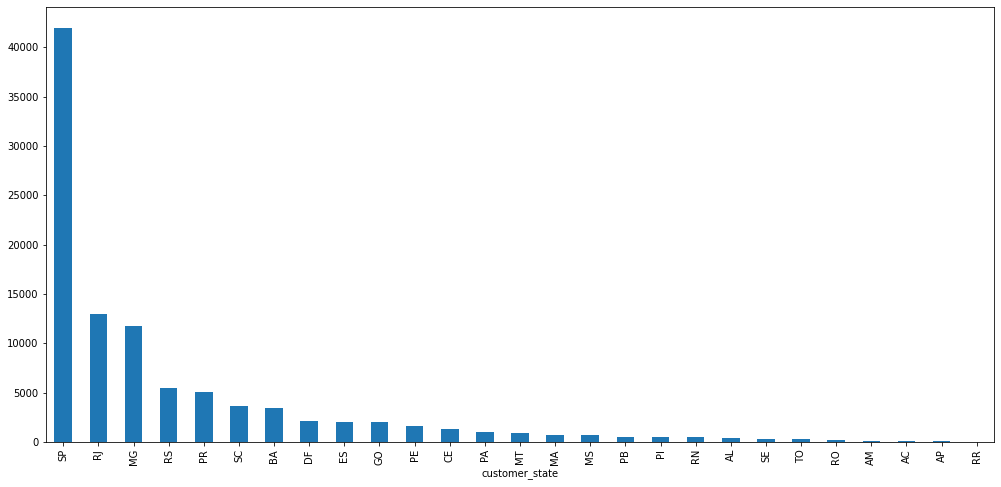

In [12]:
plt.figure(figsize=(17,8))
df_orders.groupby('customer_state')['order_id'].count().sort_values(ascending=False).plot.bar()

Distribucion Reviews

<AxesSubplot:xlabel='review_score'>

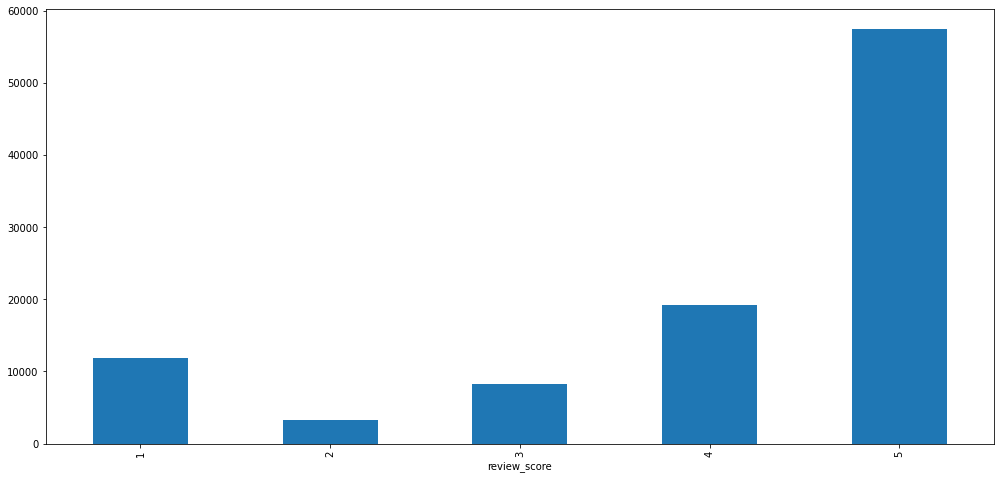

In [13]:
plt.figure(figsize=(17,8))
df_orders.groupby('review_score')['order_id'].count().plot.bar()

Cantidad de Clientes por cantidad de ordenes de cada cliente

(array([9.3015e+04, 2.5080e+03, 4.0500e+02, 1.2500e+02, 2.3000e+01,
        1.3000e+01, 5.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00]),
 array([ 1.        ,  1.94117647,  2.88235294,  3.82352941,  4.76470588,
         5.70588235,  6.64705882,  7.58823529,  8.52941176,  9.47058824,
        10.41176471, 11.35294118, 12.29411765, 13.23529412, 14.17647059,
        15.11764706, 16.05882353, 17.        ]),
 <BarContainer object of 17 artists>)

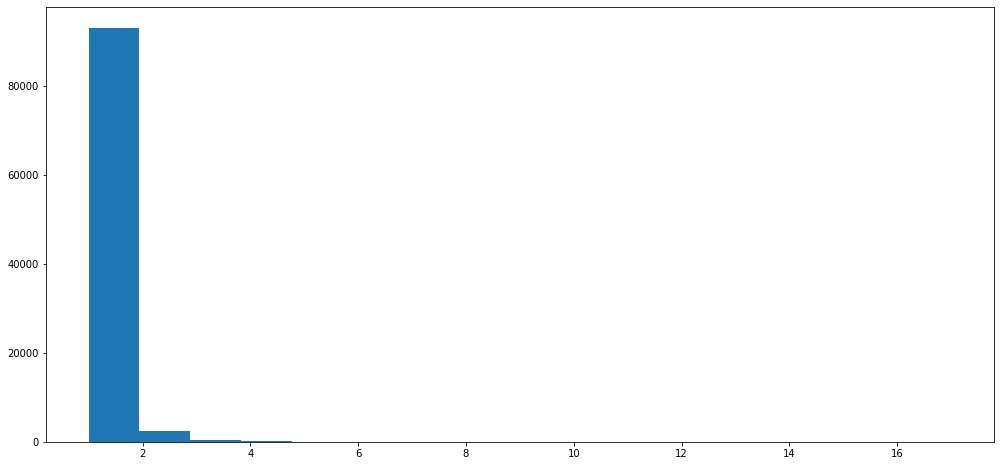

In [14]:
plt.figure(figsize=(17,8))
orders_client=df_orders.groupby('customer_unique_id')['order_id'].count().sort_values(ascending=False)
plt.hist(orders_client,17)

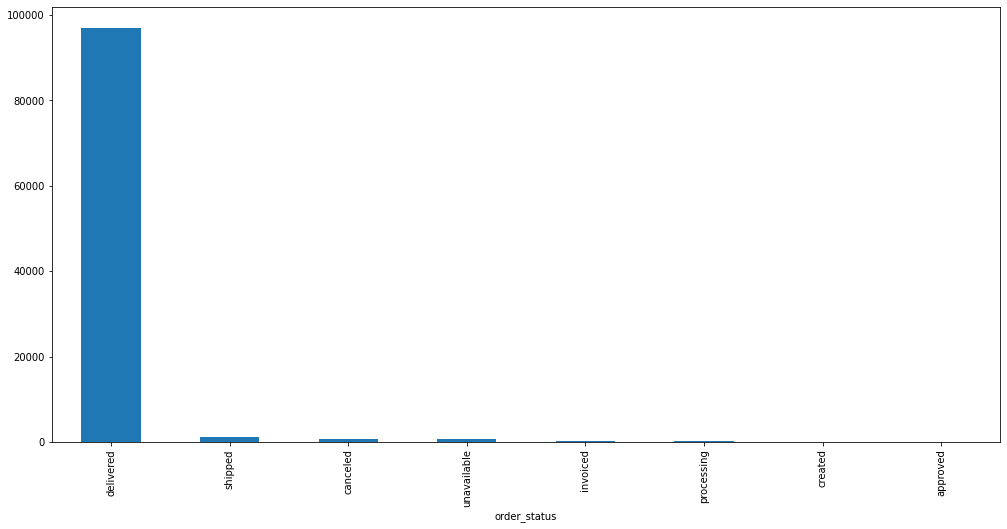

In [26]:
plt.figure(figsize=(17,8))
_=df_orders.groupby('order_status')['order_id'].count().sort_values(ascending=False).plot.bar()

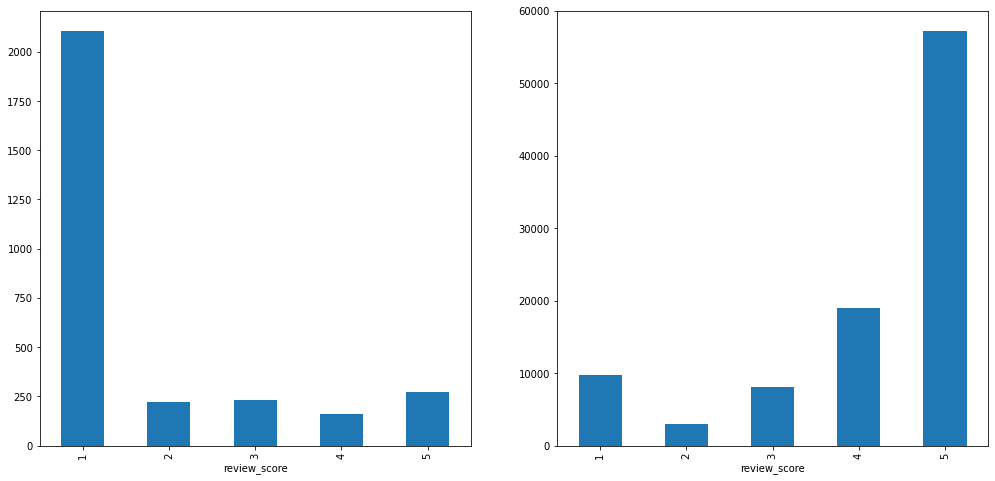

In [37]:
plt.figure(figsize=(17,8))
plt.subplot(121)
_=df_orders[df_orders.order_status!='delivered'].groupby('review_score')['order_id'].count().plot.bar()

plt.subplot(122)

_=df_orders[df_orders.order_status=='delivered'].groupby('review_score')['order_id'].count().plot.bar()